In [7]:
from keras.utils import to_categorical
from tensorflow.keras.utils import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tqdm.notebook import tqdm
import os
import pandas as pd
import numpy as np

In [8]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [9]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label,"completed")
    return image_paths,labels

In [10]:
train = pd.DataFrame()
train['image'],train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [11]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [12]:
test = pd.DataFrame()
test['image'],test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [13]:
print(test)

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]


In [14]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale = True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [15]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

c:\python3.7\lib\site-packages\keras\utils\image_utils.py:410: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  'grayscale is deprecated. Please use color_mode = "grayscale"'


In [16]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [17]:
x_train = train_features/255.0
x_test = test_features/255.0

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [14]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [15]:

model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
226/226 [==============================] - 745s 3s/step - loss: 1.8214 - accuracy: 0.2456 - val_loss: 1.8053 - val_accuracy: 0.2603
Epoch 2/100
226/226 [==============================] - 634s 3s/step - loss: 1.7847 - accuracy: 0.2560 - val_loss: 1.7104 - val_accuracy: 0.2985
Epoch 3/100
226/226 [==============================] - 547s 2s/step - loss: 1.6916 - accuracy: 0.3154 - val_loss: 1.5905 - val_accuracy: 0.4066
Epoch 4/100
226/226 [==============================] - 545s 2s/step - loss: 1.5704 - accuracy: 0.3827 - val_loss: 1.4604 - val_accuracy: 0.4299
Epoch 5/100
226/226 [==============================] - 532s 2s/step - loss: 1.4744 - accuracy: 0.4275 - val_loss: 1.3682 - val_accuracy: 0.4761
Epoch 6/100
226/226 [==============================] - 537s 2s/step - loss: 1.4184 - accuracy: 0.4503 - val_loss: 1.3133 - val_accuracy: 0.5067
Epoch 7/100
226/226 [==============================] - 536s 2s/step - loss: 1.3754 - accuracy: 0.4717 - val_loss: 1.2543 - val_accuracy:

In [16]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [1]:
from keras.models import model_from_json

In [3]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [4]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [5]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [20]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad


c:\python3.7\lib\site-packages\keras\utils\image_utils.py:410: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  'grayscale is deprecated. Please use color_mode = "grayscale"'


1/1 [==============================] - 0s 462ms/step
model prediction is  sad


original image is of sad
1/1 [==============================] - 0s 29ms/step
model prediction is  sad


c:\python3.7\lib\site-packages\keras\utils\image_utils.py:410: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  'grayscale is deprecated. Please use color_mode = "grayscale"'


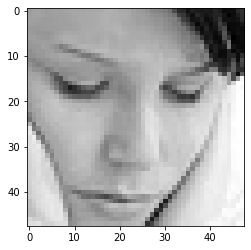

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 46ms/step
model prediction is  sad


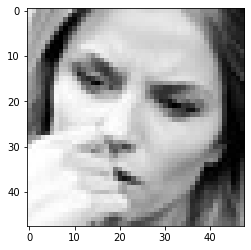

In [22]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 [==============================] - 0s 28ms/step
model prediction is  disgust


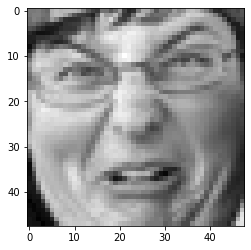

In [23]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')